# ePSproc $\beta_{L,M}$ calculations demo

10/09/19

Source [notebook on Github](https://github.com/phockett/ePSproc/blob/pkg/epsproc/tests/ePSproc_BM_calc_demo_Sept2019.ipynb).

## Basic IO

In [1]:
import sys
import os
import time
import numpy as np

# For module testing, include path to module here
modPath = r'D:\code\github\ePSproc'
sys.path.append(modPath)
import epsproc as ep

* pyevtk not found, VTK export not available. 


In [2]:
# Load data from modPath\data
dataPath = os.path.join(modPath, 'data')

# Scan data dir
dataSet = ep.readMatEle(fileBase = dataPath)  

*** ePSproc readMatEle(): scanning files for DumpIdy segments (matrix elements)

*** Scanning dir
D:\code\github\ePSproc\data
Found 2 .out file(s)


*** Reading ePS output file:  D:\code\github\ePSproc\data\n2_3sg_0.1-50.1eV_A2.inp.out
Expecting 51 energy points.
Expecting 2 symmetries.
Expecting 102 dumpIdy segments.
Found 102 dumpIdy segments (sets of matrix elements).

Processing segments to Xarrays...
Processed 102 sets of matrix elements (0 blank)

*** Reading ePS output file:  D:\code\github\ePSproc\data\no2_demo_ePS.out
Expecting 1 energy points.
Expecting 3 symmetries.
Expecting 3 dumpIdy segments.
Found 3 dumpIdy segments (sets of matrix elements).

Processing segments to Xarrays...
Processed 3 sets of matrix elements (0 blank)


## Calculate

The $\beta_{L,M}$ parameters are defined as:

$    \begin{eqnarray}
    \beta_{L,-M}^{\mu_{i},\mu_{f}} & = & \sum_{l,m,\mu}\sum_{l',m',\mu'}(-1)^{M}(-1)^{m}(-1)^{(\mu'-\mu_{0})}\left(\frac{(2l+1)(2l'+1)(2L+1)}{4\pi}\right)^{1/2}\left(\begin{array}{ccc}
    l & l' & L\\
    0 & 0 & 0
    \end{array}\right)\left(\begin{array}{ccc}
    l & l' & L\\
    -m & m' & -M
    \end{array}\right)\nonumber \\
     & \times & \sum_{P,R',R}(2P+1)(-1)^{(R'-R)}\left(\begin{array}{ccc}
    1 & 1 & P\\
    \mu & -\mu' & R'
    \end{array}\right)\left(\begin{array}{ccc}
    1 & 1 & P\\
    \mu_{0} & -\mu_{0} & R
    \end{array}\right)D_{-R',-R}^{P}(R_{\hat{n}})I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(E)I_{l',m',\mu'}^{p_{i}\mu_{i},p_{f}\mu_{f}*}(E)
    \end{eqnarray}
$

Calculations use `ep.mfblm()`, which will calculated all values at each energy point for the supplied dataset.  This may take a while in some cases due to multiple nested sums - this code will be parallelised in future.

### $N_2$ mutli-E

In [3]:
daIn = dataSet[0].copy()

# BLMXeN2 = ep.mfblm(daIn[:, 1:4], selDims = {'Type':'L'}, thres = 1e-4)       # Subselected on Eke
start = time.time()
BLMXeN2 = ep.mfblm(daIn, selDims = {'Type':'L'}, thres = 1e-4) 
end = time.time()
print('Elapsed time = {0} seconds, for {1} energy points.'.format((end-start), BLMXeN2.Eke.size))

Calculating MFBLMs for 81 pairs... Eke = 0.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 1.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 2.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 3.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 4.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 5.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 6.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 7.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 8.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 9.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 10.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 11.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 12.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pairs... Eke = 13.1 eV, eAngs = ([0, 0, 0])
Calculating MFBLMs for 81 pair

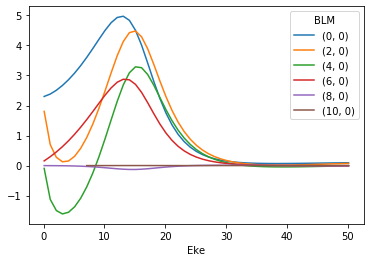

In [4]:
# Plot using Xarray functionality with thresholding
BLMXeN2.where(np.abs(BLMXeN2) > 1e-4, drop = True).real.plot.line(x='Eke')

In [6]:
# Calculate & plot MFPADs from BLMs
def MFPAD_BLM(BLMXin):
    # Calculate YLMs    
    YLMX = ep.sphCalc(BLMXin.l.max(), res=50)
    YLMX = YLMX.rename({'LM':'BLM'})    # Switch naming for multiplication & plotting
    MFPAD = BLMXin*YLMX
    MFPAD = MFPAD.rename({'BLM':'LM'})

    return MFPAD    

MFPAD = MFPAD_BLM(BLMXeN2)

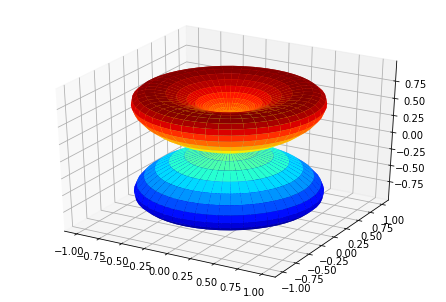

In [7]:
# Plot singe E with matplotlib
ep.sphSumPlotX(MFPAD.sel({'Eke':1.1}), pType = 'r', backend = 'matplotlib')

N2 test data, MFPADs vs E


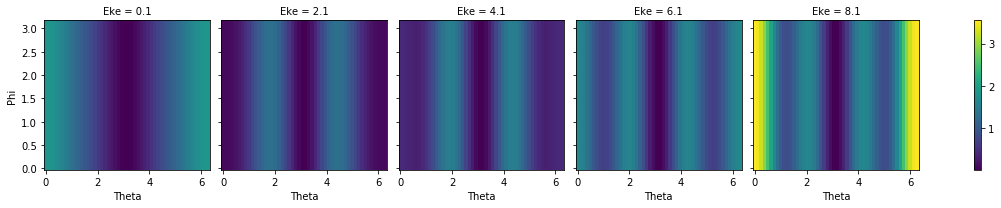

In [12]:
# Plot MFPAD surfaces vs E
print('N2 test data, MFPADs vs E')

MFPAD.sum('LM').squeeze().isel(Eke=slice(0,10,2)).real.plot(x='Theta',y='Phi', col='Eke')